# Notebook for learning luminosity distance in order to fit supernova modulus $\mu$ that is used for the study of the luminosity distance evolution respect to the redshift using standarized supernovae observations.




### Luminosity Distance : $D_L(z)$

The luminosity distance allow to express the flux we observe $f$ from a source with intrinsec luminosity $L$ as:

$$f = \frac{L}{4\pi \,D_L^2(z)}$$, 

taking into account the effects of the expansion over the time and sapatial elements expressed by the facto $(1+z_{emit})$:

$$D_L(z_{emit})=\frac{c(1+z_{emit})}{H_{0}}\int_{0}^{z_{emit}}\frac{dz}{\sqrt{\Omega_{M,0}(1+z)^{3}+\Omega_{R,0}(1+z)^{4}+\Omega_{\Lambda}}}$$

### Magnitude : $m_b$

In astronomy, it is more usual to use a magnitude rather than a flux. In fact, it is much more convenient to manipulate a unitless quantity and that eveolve over a reasonable range of value. So, historically, the mangnitude in a band of observation $b$ is defined as the of the log10 of the ratio between the flux measured in a band ($f_b$) and a flux of reference in the same band ($f_{b,0}$) :

$$ m_b = -2.5 \log_{10}\left(\frac{f_b}{f_{b,0}}\right) $$.

The factor 2.5 corresponds approximately to $\sqrt[5]{100}$, to match with the definition of "the stars of sixth magnitude are 100 times fainter than the stars of first magnitude"... The flux of reference was generally the one measured for Sirius or Vega stars. If so, the magnitude system is called Sirius or Vega system. Nowaday, we prefer to use flat flux calibration (also using leds), and the AB-system is the more common. 

### Standardisation of the SN-Ia supernovae magnitudes

The luminosity of the type-Ia supernovae is not a standard value but a standardizable one. After a very nice efforts over at least a decade, different groups shown that a stretch-color correction was abble to map all the observed SN-Ia luminosity to one value. This stretch-color correction on the magnitude reads as:

$$ m_B\rightarrow m_B^* = m_B + \alpha (s-1)-\beta c  $$

where the parameters $\alpha$ and $\beta$ must to be evaluated for an analysis, $s$ is the stretch and $c$ the color of the light each light curve.

### Absolute magnitude

We also need to define the absolute magnitude $M_b$ that correspond to the magnitud we should measure if we place our telescope at a distance of 10 parsecs from the source. So, if one know the luminosity (the flux emmited all around the source) $L$, then the flux measured at 10 pc should be:


$$ f_b(10pc) = \frac{L}{4\pi (10pc)^2} $$

considering the luminosity inside the band $b$. Finally, the absolute magnitude is simply:

$$ M_b \equiv -2.5 \log_{10} \left(\frac{f_b(10pc)}{f_{b,0}}\right) = -2.5 \log_{10} \left(\frac{L}{4\pi (10pc)^2 \times f_{b,0}}\right) $$


### Distance modulus

It is convenient to define the distance modulus $\mu$ as:

$$ \mu = m_b^* - M_b =-2.5 \log_{10}\left(\frac{f_b^* \times f_{b,0}}{f_b(10pc)\times f_{b,0}}\right) = -2.5 \log_{10}\left(\frac{L/4\pi D_L^2(z)}{L/4\pi (10pc)^2}\right) = 5 \log_{10}\left(\frac{ D_L(z)}{10pc}\right)$$

where we used that the corrected magnitude $ m_b^*$ correspond to the magnitude we sholf mesure with the corrected flux $f_b^*$:

$$ m_b^* = -2.5 \log_{10}\left(\frac{f_b^*}{f_{b,0}}\right) $$

## Preparation of the trainning set

In order to optimize the exercise, we will notice two things. Because we will assume a flat Universe, we directly have a reltion $\Omega_{\Lambda} = 1 - \Omega_m$. So we just need to move $\Omega_m$ and $H_0$. Moreover, we can note from the equation:

$$D_L(z_{emit})=\frac{c(1+z_{emit})}{H_{0}}\int_{0}^{z_{emit}}\frac{dz}{\sqrt{\Omega_{M,0}(1+z)^{3}+\Omega_{R,0}(1+z)^{4}+\Omega_{\Lambda}}}$$

that we just multiply the integral by $1 / H_0$, so we can train the Network without $H_0$, recasting the modulus as a normalized modulus $\mu_N = $

$$ \mu_N = 5 \log_{10}\left(\frac{ D_L(z)\times H_0}{10pc}\right) =  5 \log_{10}\left(\frac{ D_L(z)}{10pc}\right) + 5 \log_{10}\left(H_0\right) $$

so we will obtain the real distance modulus with:

$$ \mu = \mu_N - 5 \log_{10}\left(H_0\right)$$

In [8]:
import pandas as pd
import numpy as np

c = 299792.458

Om_min = 0.2
Om_max = 0.4
nb_Om = 201

arr_Om = np.linspace(Om_min, Om_max, nb_Om)
#print(arr_Om)

z_min = 0.01
z_max = 1.7
nb_z = 170
arr_z = np.linspace(z_min, z_max, nb_z)
dz = arr_z[1] - arr_z[0]

arr_1pz3 = (1+ arr_z)**3


#X_z = np.zeros(len(arr_z)*len(arr_Om))
#X_Om = np.zeros(len(arr_z)*len(arr_Om))
X = np.zeros( (len(arr_z)*len(arr_Om), 2) )
Y = np.zeros(len(arr_z)*len(arr_Om))

for ii in range(len(arr_Om)):
    arr_H_norm = np.sqrt( arr_Om[ii]*(arr_1pz3 -1) + 1.  )
    #X_z[ii*len(arr_z) : (ii+1)*len(arr_z)] = arr_z
    #X_Om[ii*len(arr_z) : (ii+1)*len(arr_z)] = arr_Om[ii]
    X[ii*len(arr_z) : (ii+1)*len(arr_z), 0] = arr_z
    X[ii*len(arr_z) : (ii+1)*len(arr_z), 1] = arr_Om[ii]
    
    com_dist_arr = np.zeros(len(arr_z))
    
    for jj in range(len(arr_z)):
        if jj == 0: 
            com_dist_arr[jj] = c*dz/arr_H_norm[jj]
        else:
            com_dist_arr[jj] = com_dist_arr[jj-1] + c*dz/arr_H_norm[jj]
    Y[ii*len(arr_z) : (ii+1)*len(arr_z)] = 5*np.log10( com_dist_arr * (1.+arr_z) * 1.e5 )
    

###### para quadtres
data = pd.DataFrame(zip(X[:,0], X[:,1], Y), columns=['$z$', '$Om$', 'y'])


## We use the compressed modulus mean values of distance modulus from Pantheon sample to compare with our modulus evaluation

In [9]:
z_data, mu_data = np.loadtxt('Data_SNIa_mu.txt', unpack=True)

Omega_m =  0.28600000000000003


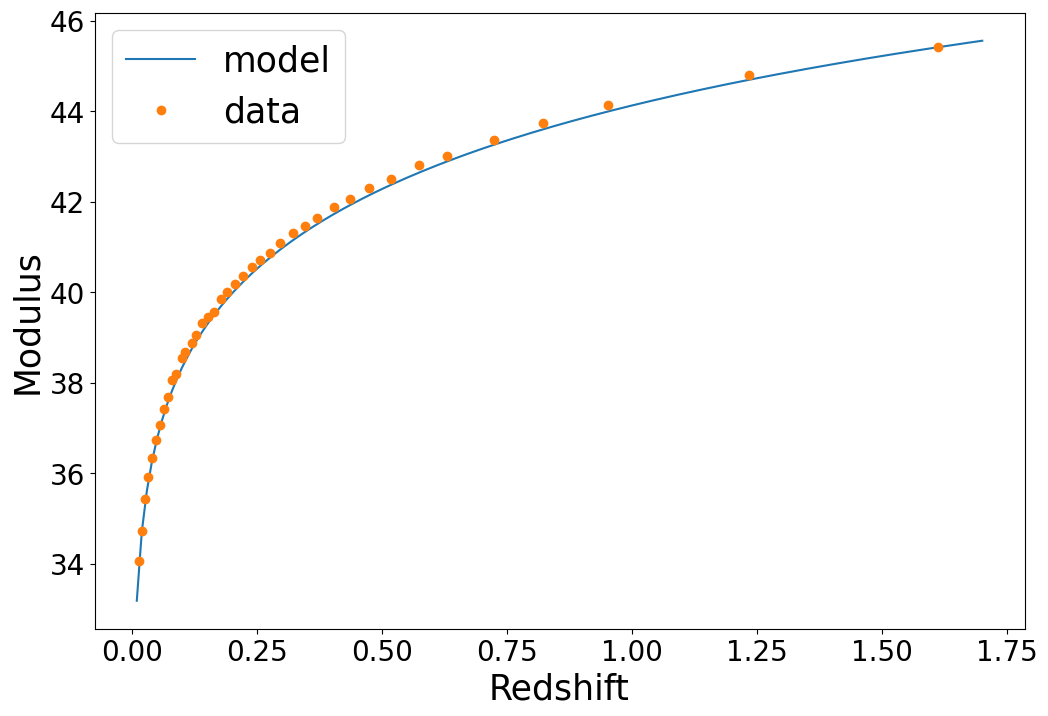

In [69]:
ii = 86
print("Omega_m = ", arr_Om[ii])

H0=69.6


plt.figure(figsize=(12,8))
plt.plot( X[ii*len(arr_z) : (ii+1)*len(arr_z),0], Y[ii*len(arr_z) : (ii+1)*len(arr_z)] - 5*np.log10(H0), label = 'model'  )
plt.plot(z_data, mu_data, 'o', label ='data')
plt.xlabel('Redshift', fontsize=25)
plt.ylabel('Modulus', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=2, fontsize=25)
plt.show()


# Part to create the Neural Network

### Import the packages that will allow to create the Neural Network

In [26]:
import tensorflow.keras as K
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

### Separate the synthetic data in trainning and validation sets

We will use a very simple version here, because the problem is very easy. So we use 80% of the data as the trainning one and the other 20% as the validation one

So we will give the X (so $\Omega_m$ and $z$ values) in input and compare the result of the only output values that will correspond to the normalized value of the distance modulus respect to the $H_0$ value.

The difference between the trainning set and the validation set, is the fact we will only use the first one to fit the weights of the Neural Network. The validation set, will be used to compare the accuracy of the prediction of the Neural Network for values it never learn about.  

In [27]:
### We separate the X vector and the ascociate Y values in 80% for the trainning and 20% for the validation 

X_train, X_val = train_test_split(X, train_size=0.8, shuffle=True, random_state=1)
Y_train, Y_val = train_test_split(Y, train_size=0.8, shuffle=True, random_state=1)

### We define the number of neurons we will use

- We need 2 neurons in input : 1 for $\Omega_m$ and 1 for $z$ values
- We will use 3 hidden layers of 100 neurons 
- We need only 1 neuron in output : the value of the normalized distnace modulus.

In [28]:
# n_input debe coincidir con el número de variables independientes, atributos o columnas.
###### Para este caso n_input = 3
n_input = 2
hidden_1 = 100
hidden_2 = 100
hidden_3 = 100
# n_output debe coincidir con el número de variables 
# dependientes o etiquetas o clases.
n_output = 1

### We define the architecture as Sequential and Dense.

It means that we will connect sequentially the different layers. There is no connection between neurons of a layer and another one that is just before or just after. Moreover, all neurons of a layer are connected to each neurons of the next layer.

In [29]:
model = Sequential()

2023-12-04 21:52:22.957890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Input layer and first hidden layer.
### This connection need to specify that the first layer we connect is the input layer. 
### We specify the keyword "input_dim"
### We specify that the hidden layer 1 will use an activation function named REctified Linear Unit (RELU)

In [30]:

model.add(K.layers.Dense(hidden_1, input_dim=n_input, activation='relu'))


### We add the Hidden layers connecting the sequentially the hidden layers 2 and 3.
### Also we define the RELU activation function

In [31]:

model.add(K.layers.Dense(hidden_2, activation='relu'))
model.add(K.layers.Dense(hidden_3, activation='relu'))

### Output layer. As for the input layer, the outpu layer requires a specific declaration.
### In particular, the activation function is generally specific to the specific kind of answer we need.

Here we use a linear activation function, so like if there is no activation function.

In [32]:

model.add(K.layers.Dense(n_output, activation='linear'))

### We define the function to back propagate the error over the weights

Back-propagate the error means : change layer by layer all the weights following the gradient.
So that's important to have Activation function that we can derive easily the derivative !

We do not want to fit directly the actual data, or sample of data (batch size>1) evaluated by the network. So we want to move slightly the weights and learn from the whole trainning set data.

The parameter that controle the "slightly" is the learning rate. At the beginning, we can start with larger value, allowing to move faster the weights, when we are still far from the region of interest. And then, each time the validation set stop to learn, reduce the learning rate, fitting in more details the weights.

In [33]:
optimizer = K.optimizers.Adam(learning_rate=0.0001)

### We compile the Network

In [34]:
# Se compila el modelo, eligiendo Optimizador y Función de pérdida.
model.compile(optimizer=optimizer, loss='mean_squared_error')


# We will play NOW !!!!!!

# How many weights we have to fit in this Neural Network ?

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


### We define the  batch size (number of data we use before to back-propagate the error).

The choice of the batch size can be important depending on the task of the network. A small batch size will extract more information from each data, but can lead to a fitting of specific informations of these data +> risk of overfitting. Using a bigger batch size will allow to capture more general features. 

In [36]:
epochs = 150
bs = 16

### We define a callback function that stop the trainning when the Network stop to learn

You can just wait for the end, so that so whole epochs finish to stop the trainning of the Network. But it is always interesting to evaluate how the Network is learning. So  you can define a number of epochs to be patient before to decide to stop. The patience is so the number of epochs for which the **loss function of validation set** will be stable or growing.

A more interesting stuff to do is to adapt the learning rate when the loss function of the validation set stoped improving. You will see thos with other tutorials during this workshop.

In [37]:
callback = K.callbacks.EarlyStopping(monitor='loss', patience=20)

# We can start to train the Neural Network !!!!

In [38]:


history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    epochs=epochs, batch_size=bs, callbacks=[callback])

Epoch 1/150
1709/1709 [==============================] - 2s 925us/step - loss: 575.1394 - val_loss: 9.6499
Epoch 2/150
1709/1709 [==============================] - 1s 823us/step - loss: 7.1272 - val_loss: 5.4216
Epoch 3/150
1709/1709 [==============================] - 1s 738us/step - loss: 3.4283 - val_loss: 1.7807
Epoch 4/150
1709/1709 [==============================] - 1s 744us/step - loss: 0.8560 - val_loss: 0.3798
Epoch 5/150
1709/1709 [==============================] - 1s 798us/step - loss: 0.2401 - val_loss: 0.2147
Epoch 6/150
1709/1709 [==============================] - 1s 736us/step - loss: 0.1577 - val_loss: 0.1496
Epoch 7/150
1709/1709 [==============================] - 1s 737us/step - loss: 0.1152 - val_loss: 0.1096
Epoch 8/150
1709/1709 [==============================] - 1s 766us/step - loss: 0.0859 - val_loss: 0.0838
Epoch 9/150
1709/1709 [==============================] - 1s 753us/step - loss: 0.0659 - val_loss: 0.0642
Epoch 10/150
1709/1709 [=============================

Epoch 77/150
1709/1709 [==============================] - 1s 740us/step - loss: 8.3631e-04 - val_loss: 8.8260e-04
Epoch 78/150
1709/1709 [==============================] - 1s 755us/step - loss: 6.7859e-04 - val_loss: 5.6516e-04
Epoch 79/150
1709/1709 [==============================] - 1s 748us/step - loss: 7.6351e-04 - val_loss: 4.1638e-04
Epoch 80/150
1709/1709 [==============================] - 1s 869us/step - loss: 6.7110e-04 - val_loss: 4.3176e-04
Epoch 81/150
1709/1709 [==============================] - 1s 832us/step - loss: 6.3909e-04 - val_loss: 0.0016
Epoch 82/150
1709/1709 [==============================] - 1s 741us/step - loss: 6.2418e-04 - val_loss: 2.7195e-04
Epoch 83/150
1709/1709 [==============================] - 1s 746us/step - loss: 7.0732e-04 - val_loss: 2.8670e-04
Epoch 84/150
1709/1709 [==============================] - 1s 779us/step - loss: 7.0570e-04 - val_loss: 5.8717e-04
Epoch 85/150
1709/1709 [==============================] - 1s 739us/step - loss: 5.8036e-04 -

### We plot the evolution of the trainning set and the validation set

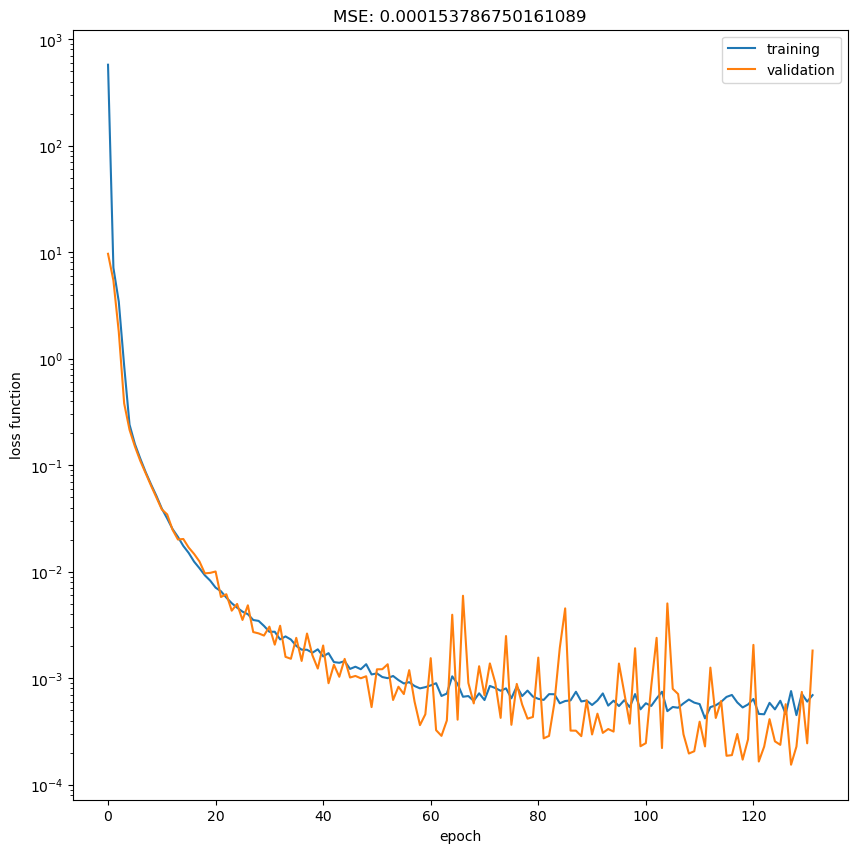

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
mse = np.min(history.history['val_loss'])
plt.title('MSE: {}'.format(mse))
plt.yscale('log')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right') 
plt.show()

## some comparisons

In [51]:
ii = 100


test = np.zeros(len(arr_z))

for ii in range(len(arr_z)) : 
    new_vector = np.array([arr_z[ii], arr_Om[ii]]).reshape(1,-1)
    prediction = model.predict(new_vector )
    test[ii] = prediction

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


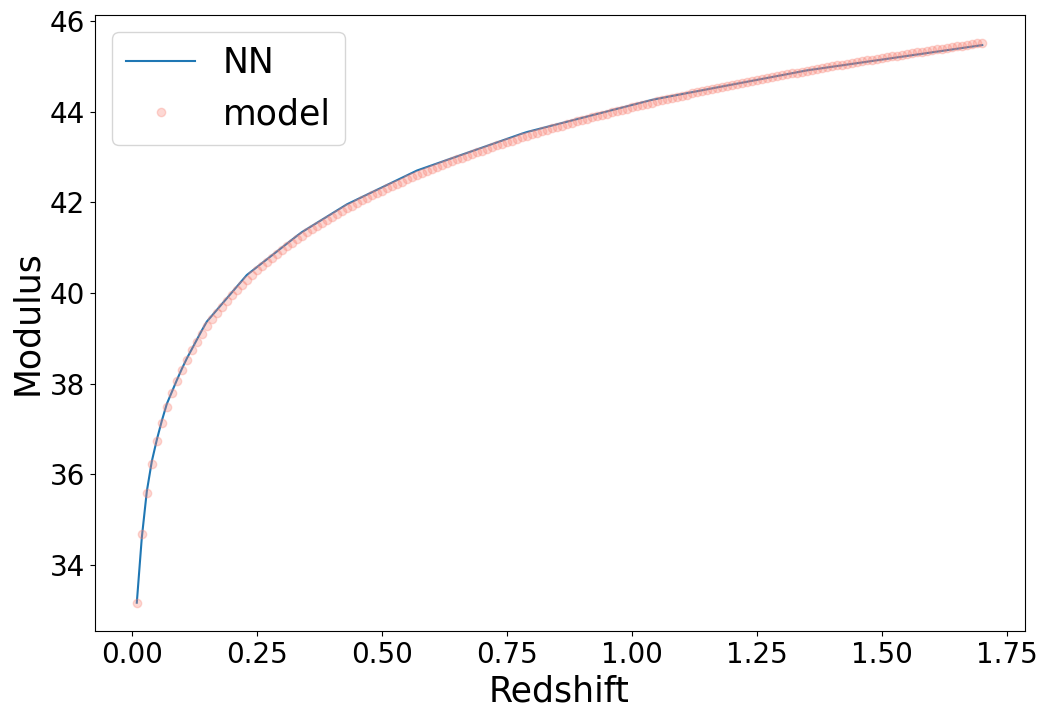

In [72]:
H0 = 70

plt.figure(figsize=(12,8))

plt.plot(arr_z, test-5*np.log10(H0), label = 'NN')
ii = 100 ### Omega_m = 0.3
plt.plot(arr_z, Y[ii*len(arr_z) : (ii+1)*len(arr_z)] - 5*np.log10(H0), 'o', alpha=0.3, color='salmon', label = 'model')
plt.xlabel('Redshift', fontsize=25)
plt.ylabel('Modulus', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=2, fontsize=25)
plt.show()

## Generalization

One of the most important achievement of the Neural Networks is the generalization, in other words, the possibility to ask for values for which we trained the Neural Networks


In [73]:
print(model.predict(np.array([.9834, 0.2345]).reshape(1,-1)))

1/1 [==============================] - 0s 26ms/step
[[53.394463]]


## So now, you can connect a MCMC sampler where you use the Neural Network to generate the distance modulus and fit the data